In [ ]:
!pip install lofo-importance

In [ ]:
!pip install pdpbox

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.8/35.8 MB 22.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 59.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 53.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 kB 15.4 MB/s eta 0:00:00
  Attempting uninstall: sphinx
    Found existing installation: Sphinx 5.0.2
    Uninstalling Sphinx-5.0.2:
      Successfully uninstalled Sphinx-5.0.2


In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 1.6 MB/s eta 0:00:00


In [ ]:
from lofo import LOFOImportance, Dataset, plot_importance
import shap
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from pdpbox import pdp, info_plots
from sklearn.metrics import accuracy_score,recall_score,precision_score,roc_auc_score,f1_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.model_selection import KFold

In [ ]:
dt=pd.read_csv('/content/archive (2).zip')

In [ ]:
dt.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

In [ ]:
dt['chest_pain_type'][dt['chest_pain_type'] == 1] = 'typical angina'
dt['chest_pain_type'][dt['chest_pain_type'] == 2] = 'atypical angina'
dt['chest_pain_type'][dt['chest_pain_type'] == 3] = 'non-anginal pain'
dt['chest_pain_type'][dt['chest_pain_type'] == 4] = 'asymptomatic'



dt['rest_ecg'][dt['rest_ecg'] == 0] = 'normal'
dt['rest_ecg'][dt['rest_ecg'] == 1] = 'ST-T wave abnormality'
dt['rest_ecg'][dt['rest_ecg'] == 2] = 'left ventricular hypertrophy'

dt['st_slope'][dt['st_slope'] == 1] = 'upsloping'
dt['st_slope'][dt['st_slope'] == 2] = 'flat'
dt['st_slope'][dt['st_slope'] == 3] = 'downsloping'

dt['thalassemia'][dt['thalassemia'] == 1] = 'normal'
dt['thalassemia'][dt['thalassemia'] == 2] = 'fixed defect'
dt['thalassemia'][dt['thalassemia'] == 3] = 'reversable defect'

In [ ]:
dt.head()

age  sex   chest_pain_type  resting_blood_pressure  cholesterol  \
0   63    1  non-anginal pain                     145          233   
1   37    1   atypical angina                     130          250   
2   41    0    typical angina                     130          204   
3   56    1    typical angina                     120          236   
4   57    0                 0                     120          354   

   fasting_blood_sugar               rest_ecg  max_heart_rate_achieved  \
0                    1                 normal                      150   
1                    0  ST-T wave abnormality                      187   
2                    0                 normal                      172   
3                    0  ST-T wave abnormality                      178   
4                    0  ST-T wave abnormality                      163   

   exercise_induced_angina  st_depression st_slope  num_major_vessels  \
0                        0            2.3        0                  0   
1                        0            3.5        0                  0   
2                        0            1.4     flat                  0   
3                        0            0.8     flat                  0   
4                        1            0.6     flat                  0   

    thalassemia  target  
0        normal       1  
1  fixed defect       1  
2  fixed defect       1  
3  fixed defect       1  
4  fixed defect       1

In [ ]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      303 non-null    int64  
 1   sex                      303 non-null    int64  
 2   chest_pain_type          303 non-null    object 
 3   resting_blood_pressure   303 non-null    int64  
 4   cholesterol              303 non-null    int64  
 5   fasting_blood_sugar      303 non-null    int64  
 6   rest_ecg                 303 non-null    object 
 7   max_heart_rate_achieved  303 non-null    int64  
 8   exercise_induced_angina  303 non-null    int64  
 9   st_depression            303 non-null    float64
 10  st_slope                 303 non-null    object 
 11  num_major_vessels        303 non-null    int64  
 12  thalassemia              303 non-null    object 
 13  target                   303 non-null    int64  
dtypes: float64(1), int64(9), o

In [ ]:
dt.isnull().sum()

age                        0
sex                        0
chest_pain_type            0
resting_blood_pressure     0
cholesterol                0
fasting_blood_sugar        0
rest_ecg                   0
max_heart_rate_achieved    0
exercise_induced_angina    0
st_depression              0
st_slope                   0
num_major_vessels          0
thalassemia                0
target                     0
dtype: int64

In [ ]:
dt1=pd.get_dummies(dt,drop_first=True)

In [ ]:
dt1.head()

age  sex  resting_blood_pressure  cholesterol  fasting_blood_sugar  \
0   63    1                     145          233                    1   
1   37    1                     130          250                    0   
2   41    0                     130          204                    0   
3   56    1                     120          236                    0   
4   57    0                     120          354                    0   

   max_heart_rate_achieved  exercise_induced_angina  st_depression  \
0                      150                        0            2.3   
1                      187                        0            3.5   
2                      172                        0            1.4   
3                      178                        0            0.8   
4                      163                        1            0.6   

   num_major_vessels  target  chest_pain_type_atypical angina  \
0                  0       1                            False   
1                  0       1                             True   
2                  0       1                            False   
3                  0       1                            False   
4                  0       1                            False   

   chest_pain_type_non-anginal pain  chest_pain_type_typical angina  \
0                              True                           False   
1                             False                           False   
2                             False                            True   
3                             False                            True   
4                             False                           False   

   rest_ecg_left ventricular hypertrophy  rest_ecg_normal  st_slope_flat  \
0                                  False             True          False   
1                                  False            False          False   
2                                  False             True           True   
3                                  False            False           True   
4                                  False            False           True   

   st_slope_upsloping  thalassemia_fixed defect  thalassemia_normal  \
0               False                     False                True   
1               False                      True               False   
2               False                      True               False   
3               False                      True               False   
4               False                      True               False   

   thalassemia_reversable defect  
0                          False  
1                          False  
2                          False  
3                          False  
4                          False

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(dt1.drop(["target"],axis = 1),),
        columns=['age', 'resting_blood_pressure', 'cholesterol', 'max_heart_rate_achieved', 'st_depression',
       'num_major_vessels', 'sex_male', 'chest_pain_type_atypical angina','chest_pain_type_non-anginal pain','chest_pain_type_typical angina','fasting_blood_sugar_lower than 120mg/ml','rest_ecg_left ventricular hypertrophy','rest_ecg_normal','exercise_induced_angina_yes','st_slope_flat','st_slope_upsloping','thalassemia_fixed defect','thalassemia_normal','thalassemia_reversable defect'])

In [ ]:
y=dt['target']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
random_forest = RandomForestClassifier(n_estimators=500,criterion='entropy',max_depth=5).fit(x_train, y_train)
y_pred_random = random_forest.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred_random)

0.819672131147541

In [ ]:
print(classification_report(y_test,y_pred_random))

              precision    recall  f1-score   support

           0       0.80      0.83      0.81        29
           1       0.84      0.81      0.83        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



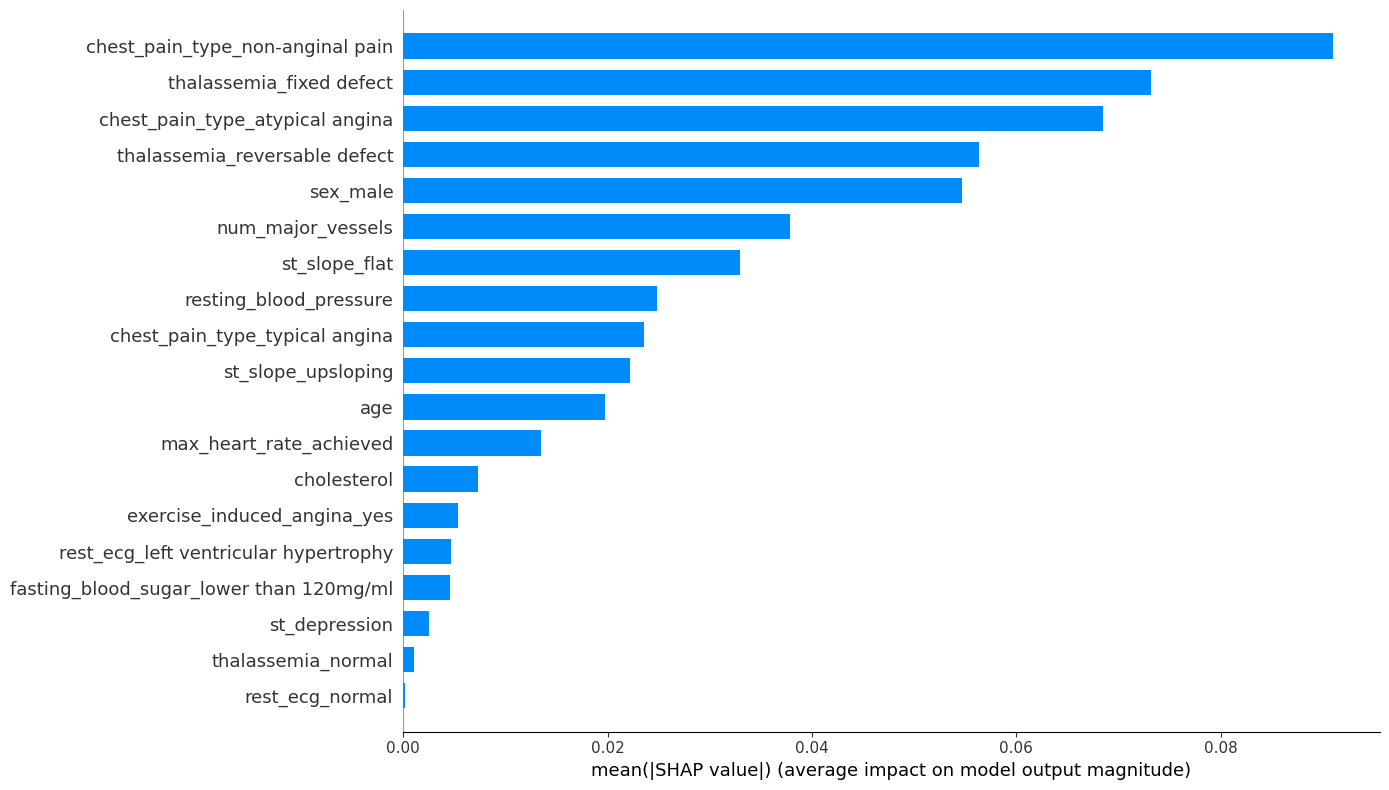

In [ ]:
explainer = shap.TreeExplainer(random_forest)
shap_values = explainer.shap_values(x_test)
shap.summary_plot(shap_values[:,:,1],x_test,plot_type="bar",plot_size=(14,8))

In [ ]:
shap_values.shape

(61, 19, 2)

In [ ]:
x_test.shape

(61, 19)

In [ ]:
from sklearn.inspection import PartialDependenceDisplay
from sklearn.inspection import partial_dependence

In [ ]:
features = [c for c in x_test.columns]

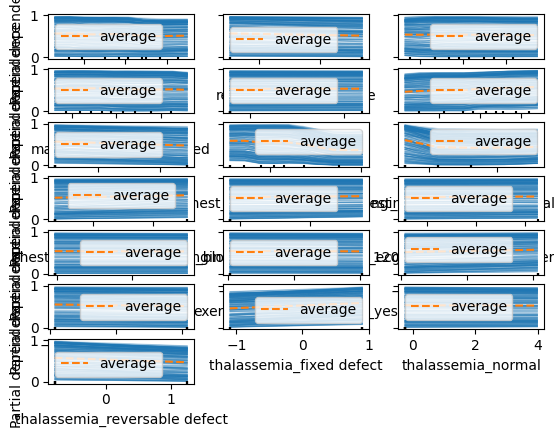

In [ ]:
disp=PartialDependenceDisplay.from_estimator(random_forest,X,features=features,kind="both",grid_resolution=10)

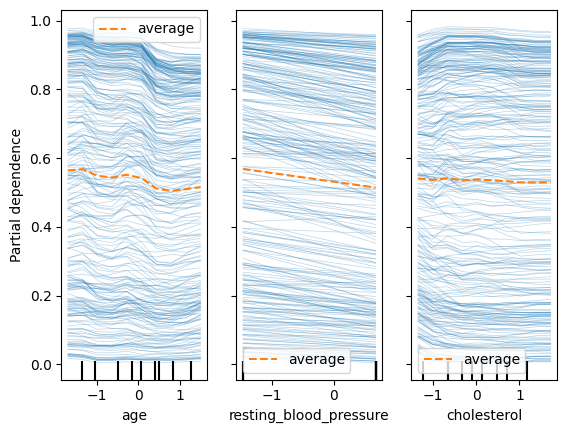

In [ ]:
disp=PartialDependenceDisplay.from_estimator(random_forest,X,features=[0,1,2],kind="both",grid_resolution=10)

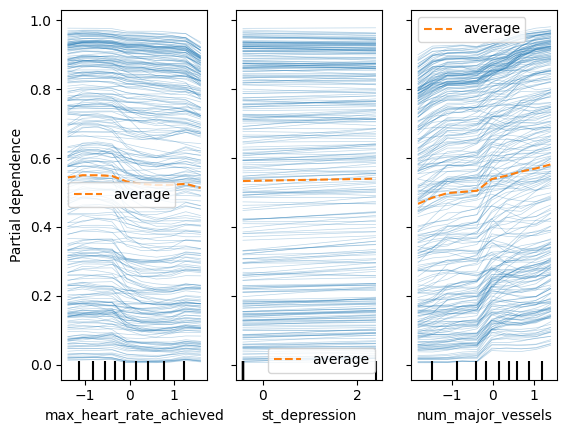

In [ ]:
disp=PartialDependenceDisplay.from_estimator(random_forest,X,features=[3,4,5],kind="both",grid_resolution=10)

In [ ]:
disp=PartialDependenceDisplay.from_estimator(random_forest,X,features=[6,7,8],kind="both",grid_resolution=10)

In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=fe9e5e1d2204f820d4f0b459ed6d1753862d23633dd07c0584ae27b4fac21e60
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
import lime
import lime.lime_tabular

In [ ]:
class_names=['Healthy','Disease']

In [ ]:
explainer = lime.lime_tabular.LimeTabularExplainer(x_train.values, feature_names=features, class_names=class_names, discretize_continuous=True)

In [ ]:
instance=x_test.values[0]

exp = explainer.explain_instance(instance, random_forest.predict_proba).show_in_notebook()

In [ ]:
instance=x_test.values[12]

exp = explainer.explain_instance(instance, random_forest.predict_proba).show_in_notebook()

https://www.kaggle.com/code/sid321axn/complete-model-explanation-helping-docs/notebook